In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

**Reading the Dataset**

In [3]:
data = pd.read_csv('/content/Dataset .csv')
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Grouping by City**

In [5]:
grouped_city = data.groupby('City')

**Counting the Number of Restaurants per City**

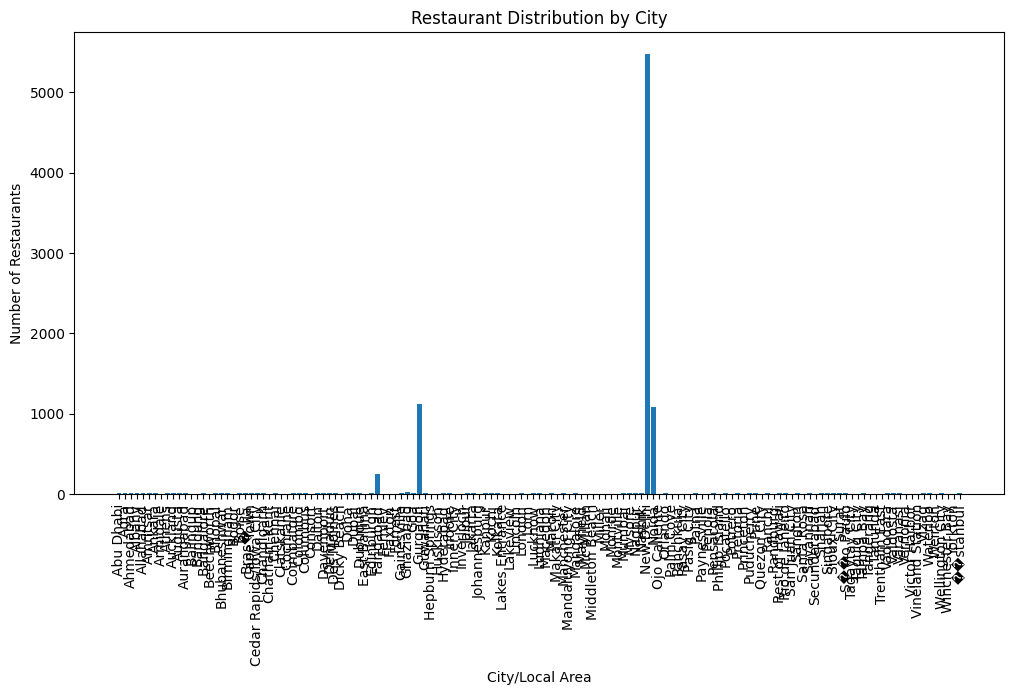

In [6]:
restaurant_counts = grouped_city['Restaurant Name'].count()
plt.figure(figsize=(12, 6))
plt.bar(restaurant_counts.index, restaurant_counts.values)
plt.xlabel('City/Local Area')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Distribution by City')
plt.xticks(rotation=90)
plt.show()

**K-Means Clustering for Restaurant Locations**

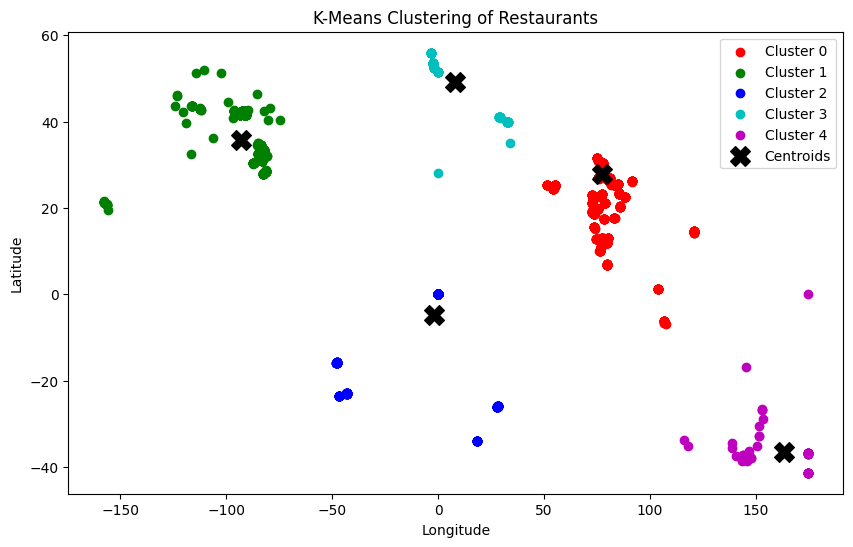

In [7]:
from sklearn.cluster import KMeans

coordinates = data[['Latitude', 'Longitude']]
k_clusters = 5
kmeans_model = KMeans(n_clusters=k_clusters, random_state=0)
data['Cluster_Label'] = kmeans_model.fit_predict(coordinates)
cluster_colors = ['r', 'g', 'b', 'c', 'm']

plt.figure(figsize=(10, 6))
for cluster in range(k_clusters):
    clustered_data = data[data['Cluster_Label'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'],
                c=cluster_colors[cluster], label=f'Cluster {cluster}')

plt.scatter(kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 0],
            s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Restaurants')
plt.legend()
plt.show()

**Calculating Average Ratings by City**

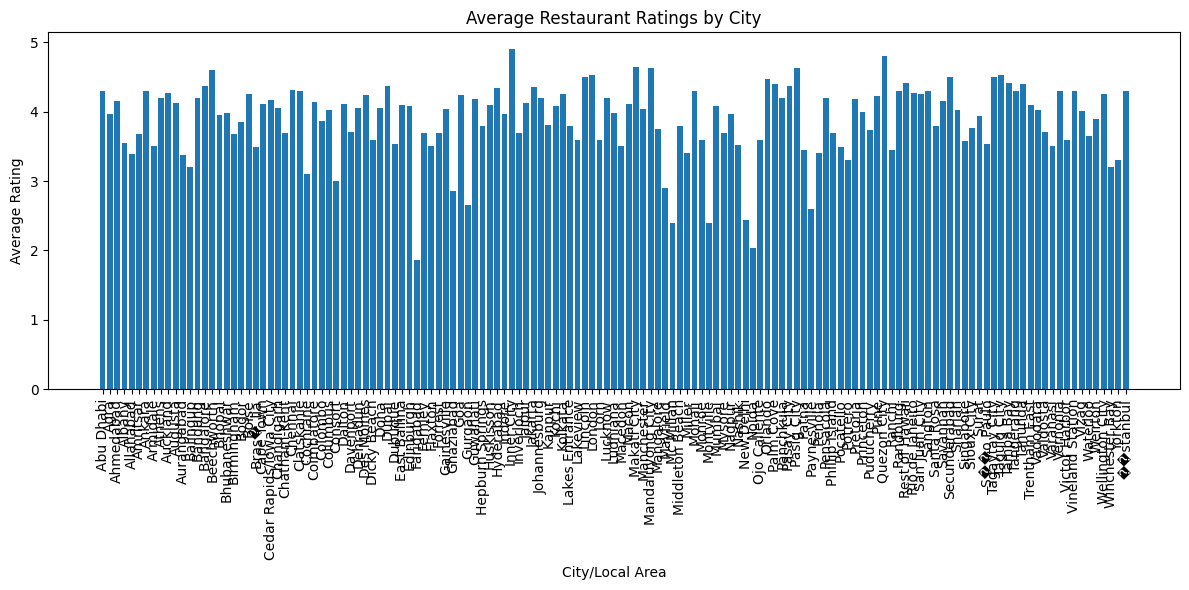

In [8]:
avg_ratings = grouped_city['Aggregate rating'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_ratings.index, avg_ratings.values)
plt.xlabel('City/Local Area')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Ratings by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Identifying Popular Cuisines by City**

In [9]:
popular_cuisines = grouped_city['Cuisines'].agg(lambda x: x.mode().tolist())
print(popular_cuisines)

City
Abu Dhabi                         [American, Indian, Italian, Pizza]
Agra                                         [North Indian, Mughlai]
Ahmedabad          [Cafe, American, Continental, Armenian, Fast F...
Albany                                      [Japanese, Steak, Sushi]
Allahabad                                    [North Indian, Chinese]
                                         ...                        
Weirton                                    [Burger, Greek, Sandwich]
Wellington City                                               [Cafe]
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
��stanbul                                                     [Cafe]
Name: Cuisines, Length: 141, dtype: object


**Visualizing Cuisine Popularity by City**

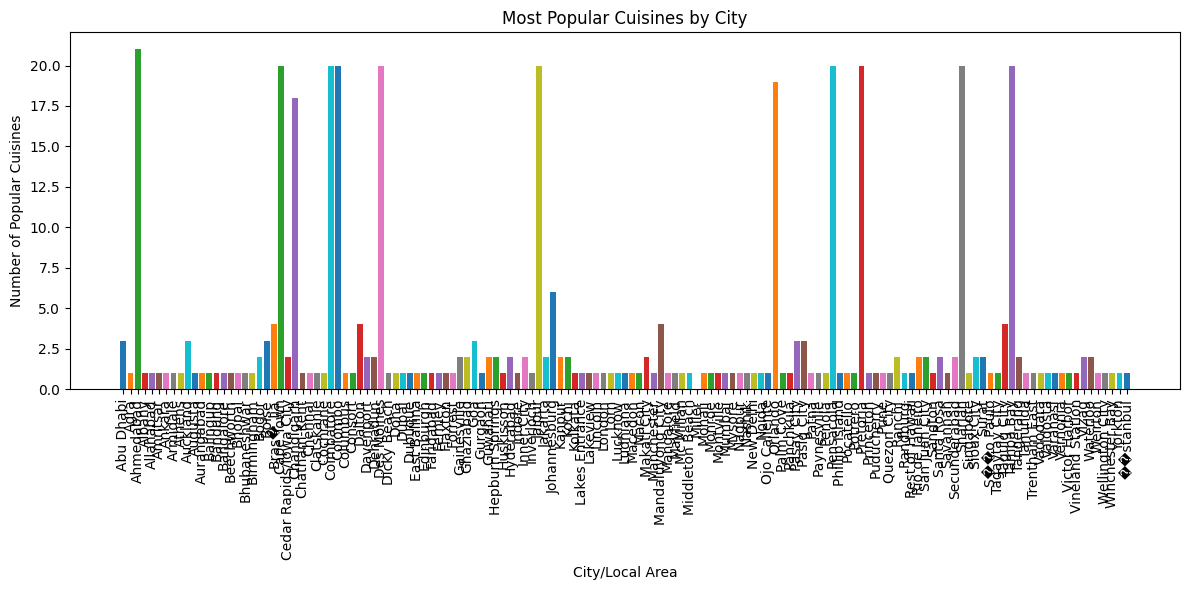

In [10]:
plt.figure(figsize=(12, 6))
for city, cuisines in popular_cuisines.items():
    plt.bar(city, len(cuisines))
plt.xlabel('City/Local Area')
plt.ylabel('Number of Popular Cuisines')
plt.title('Most Popular Cuisines by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Price Range Analysis per City**

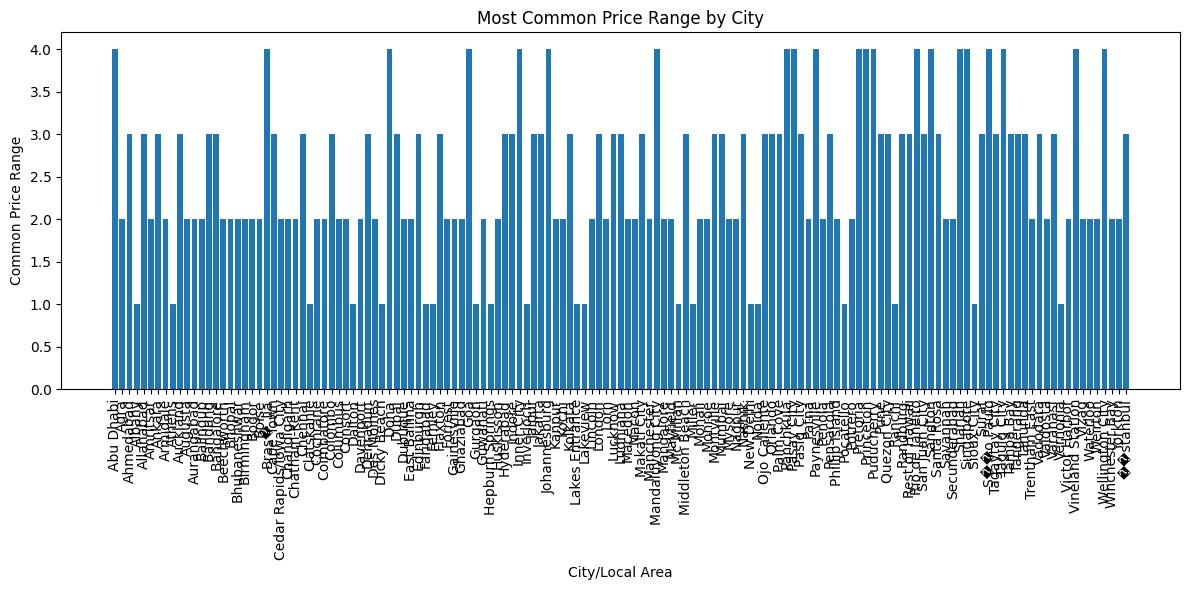

In [11]:
common_price_range = grouped_city['Price range'].agg(lambda x: x.mode().iloc[0])
plt.figure(figsize=(12, 6))
plt.bar(common_price_range.index, common_price_range.values)
plt.xlabel('City/Local Area')
plt.ylabel('Common Price Range')
plt.title('Most Common Price Range by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Analyzing Cuisine Diversity per City**

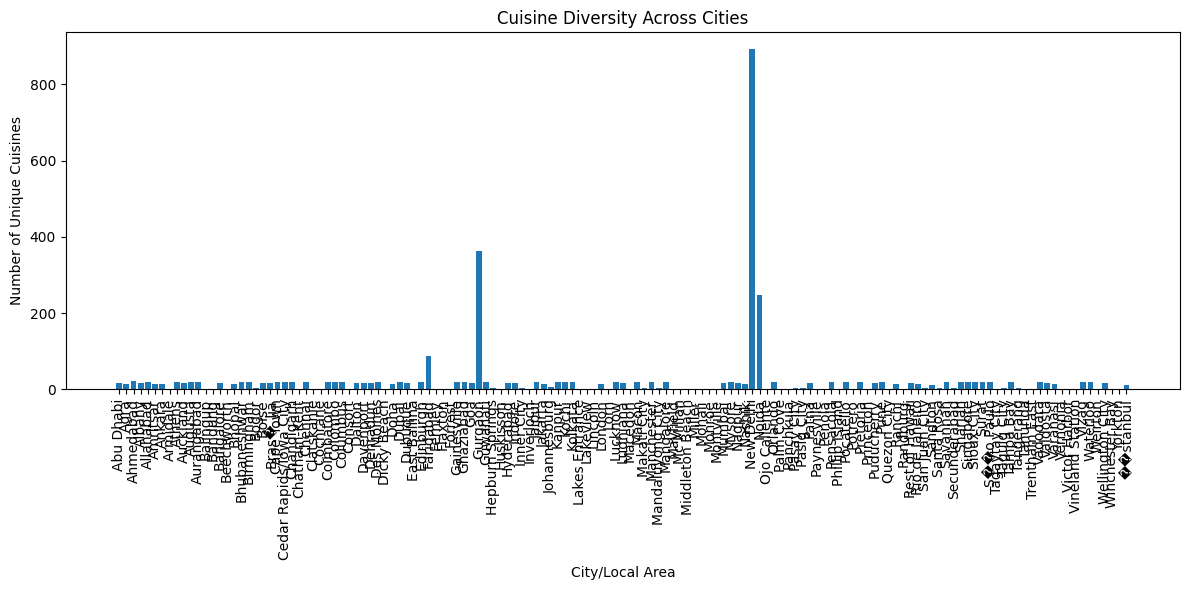

In [12]:
cuisine_variety = grouped_city['Cuisines'].apply(lambda x: len(set(x)))
plt.figure(figsize=(12, 6))
plt.bar(cuisine_variety.index, cuisine_variety.values)
plt.xlabel('City/Local Area')
plt.ylabel('Number of Unique Cuisines')
plt.title('Cuisine Diversity Across Cities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Conclusion :-**This analysis offers valuable insights into the distribution of restaurants, clustering patterns, average ratings, preferred cuisines, pricing trends, and the diversity of cuisines across various cities.
